In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Todo: remove once have pip install
import sys  
sys.path.insert(0, 'C:\python_projects\RotationFeatures_project\RotationFeatures')
from RotationFeatures import RotationFeatures, GraphTwoDimTree # todo: fix once have pip install

np.random.seed(0)

In [3]:
def get_iris():
    iris = load_iris()
    X, y = iris.data, iris.target
    X = pd.DataFrame(X, columns=iris['feature_names'])
    y = pd.Series(y)
    return X, y

In [4]:
X,y = get_iris()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
rota = RotationFeatures(degree_increment=30)
rota.fit(X_train)
X_train_extended = rota.transform(X_train)
X_train_extended = pd.DataFrame(X_train_extended, index=X_train.index)
X_test_extended = rota.transform(X_test)

dt = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_extended,y_train)
dt.predict(X_test_extended)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [5]:
dt.tree_.feature

array([ 2, -2,  2,  3, -2,  9, -2, -2,  8, -2, -2], dtype=int64)

In [6]:
dt.tree_.threshold

array([ 2.35000002, -2.        ,  4.95000005,  1.65000004, -2.        ,
        0.43647576, -2.        , -2.        , -0.0226588 , -2.        ,
       -2.        ])

In [7]:
display(X_train_extended.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),R_0,R_1,R_2,R_3,R_4,R_5,...,R_14,R_15,R_16,R_17,R_18,R_19,R_20,R_21,R_22,R_23
61,5.9,3.0,4.2,1.5,-0.120050,0.652377,-0.430155,0.504950,0.166588,0.155906,...,0.267706,0.567128,0.499599,0.384669,0.240331,0.582933,0.003128,0.098031,-0.046307,0.086461
92,5.8,2.6,4.0,1.2,0.255181,0.724679,-0.141346,0.755181,0.143113,0.918789,...,-0.377122,0.795082,-0.025321,1.043857,-0.543857,0.891346,0.168789,1.155926,-0.431788,1.085455
112,6.8,3.0,5.5,2.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.7,3.2,1.3,0.2,0.393073,0.708066,-0.013622,0.809740,0.222096,1.004207,...,-0.448651,0.740154,-0.055823,0.930021,-0.513355,0.777511,0.240318,1.100998,-0.342377,1.073651
141,6.9,3.1,5.1,2.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
# Determine the rows at each node
node_indexes = [[]]*len(dt.tree_.feature)
node_indexes[0] = X_train_extended.index
for node_idx in range(len(dt.tree_.feature)):
    X_local = X_train_extended.loc[node_indexes[node_idx]]
    feature_idx = dt.tree_.feature[node_idx]
    feature_name = X_train_extended.columns[feature_idx]
    if feature_idx == -2:
        continue
    threshold = dt.tree_.threshold[node_idx]
    left_child_idx = dt.tree_.children_left[node_idx]
    right_child_idx = dt.tree_.children_right[node_idx]
    attribute_arr = np.where(X_local[feature_name]<=threshold, 0, 1)            
    node_indexes[left_child_idx] = X_local.iloc[np.where(attribute_arr<=0)[0]].index
    node_indexes[right_child_idx] = X_local.iloc[np.where(attribute_arr>0)[0]].index

In [9]:
rota.get_feature_sources()

[(),
 (),
 (),
 (),
 (0, 1, 30, 0),
 (0, 1, 30, 1),
 (0, 1, 60, 0),
 (0, 1, 60, 1),
 (0, 2, 30, 0),
 (0, 2, 30, 1),
 (0, 2, 60, 0),
 (0, 2, 60, 1),
 (0, 3, 30, 0),
 (0, 3, 30, 1),
 (0, 3, 60, 0),
 (0, 3, 60, 1),
 (1, 2, 30, 0),
 (1, 2, 30, 1),
 (1, 2, 60, 0),
 (1, 2, 60, 1),
 (1, 3, 30, 0),
 (1, 3, 30, 1),
 (1, 3, 60, 0),
 (1, 3, 60, 1),
 (2, 3, 30, 0),
 (2, 3, 30, 1),
 (2, 3, 60, 0),
 (2, 3, 60, 1)]

node_idx:  0


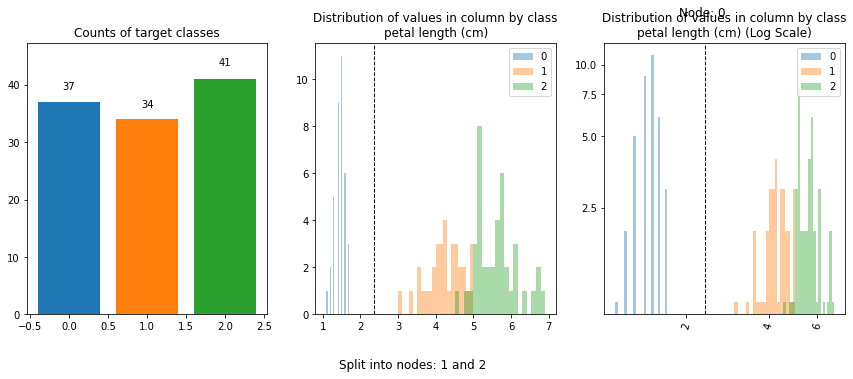

node_idx:  1


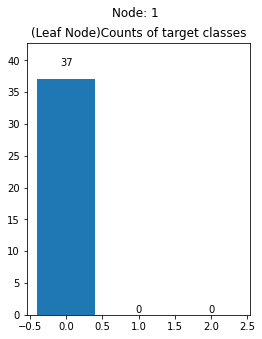

node_idx:  2


C:\python_projects\RotationFeatures_project\RotationFeatures\RotationFeatures.py:159: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


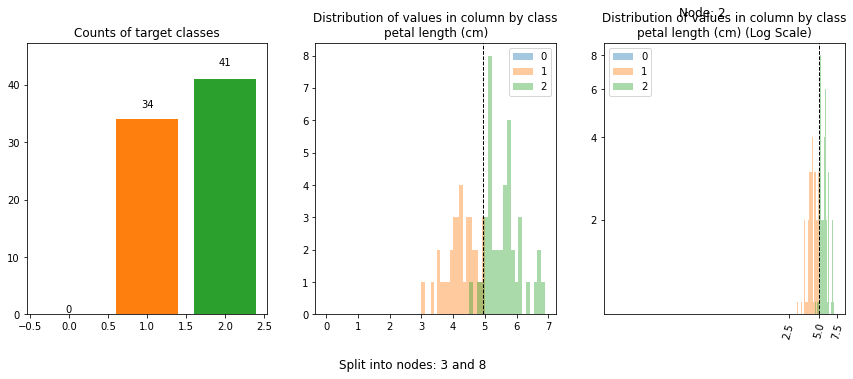

node_idx:  3


C:\python_projects\RotationFeatures_project\RotationFeatures\RotationFeatures.py:159: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


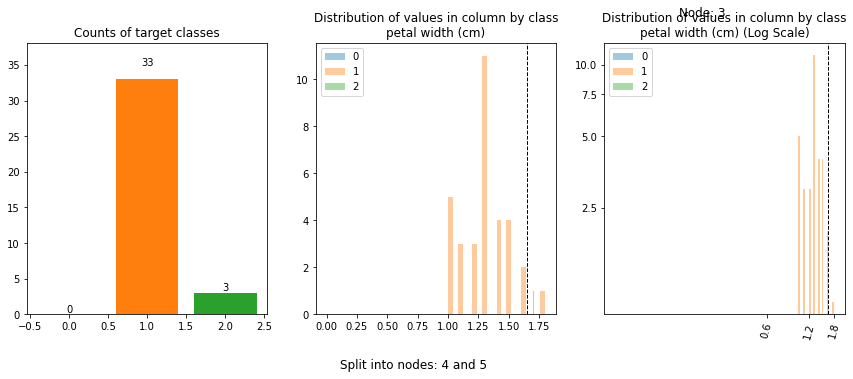

node_idx:  4


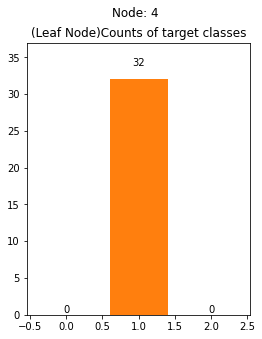

node_idx:  5
orig_feat1, orig_feat2, degrees, side:  (0, 2, 30, 1)
engineerd features. class:  0 ,  0 , len:  0
engineerd features. class:  1 ,  1 , len:  1


C:\python_projects\RotationFeatures_project\RotationFeatures\RotationFeatures.py:159: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


engineerd features. class:  2 ,  2 , len:  3
original features. class:  0 ,  0 , len:  0
original features. class:  1 ,  1 , len:  1
original features. class:  2 ,  2 , len:  3


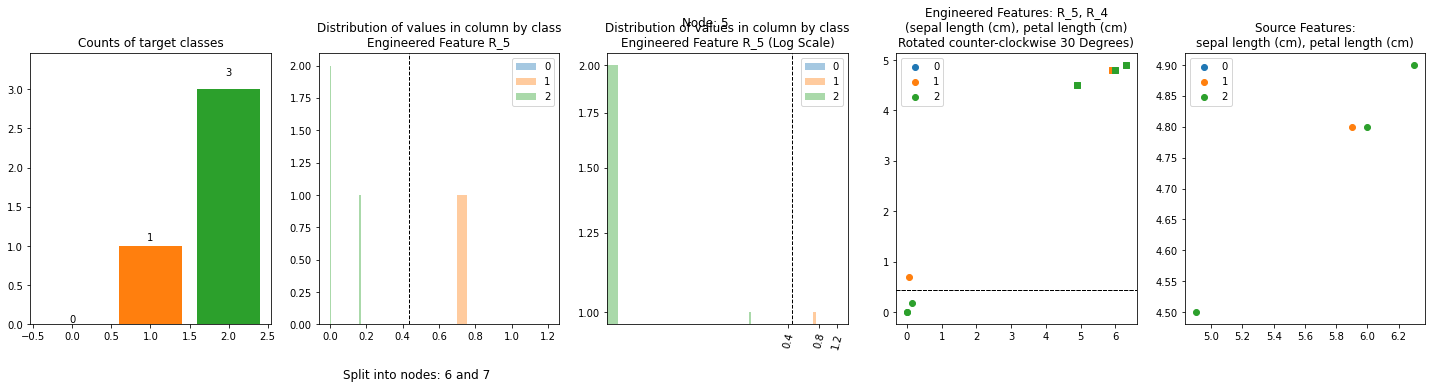

node_idx:  6


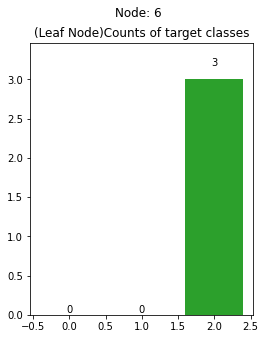

node_idx:  7


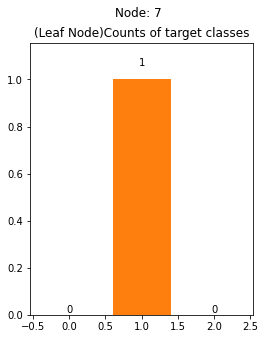

node_idx:  8
orig_feat1, orig_feat2, degrees, side:  (0, 2, 30, 0)
engineerd features. class:  0 ,  0 , len:  0
engineerd features. class:  1 ,  1 , len:  1
engineerd features. class:  2 ,  2 , len:  38
original features. class:  0 ,  0 , len:  0
original features. class:  1 ,  1 , len:  1
original features. class:  2 ,  2 , len:  38


C:\python_projects\RotationFeatures_project\RotationFeatures\RotationFeatures.py:159: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


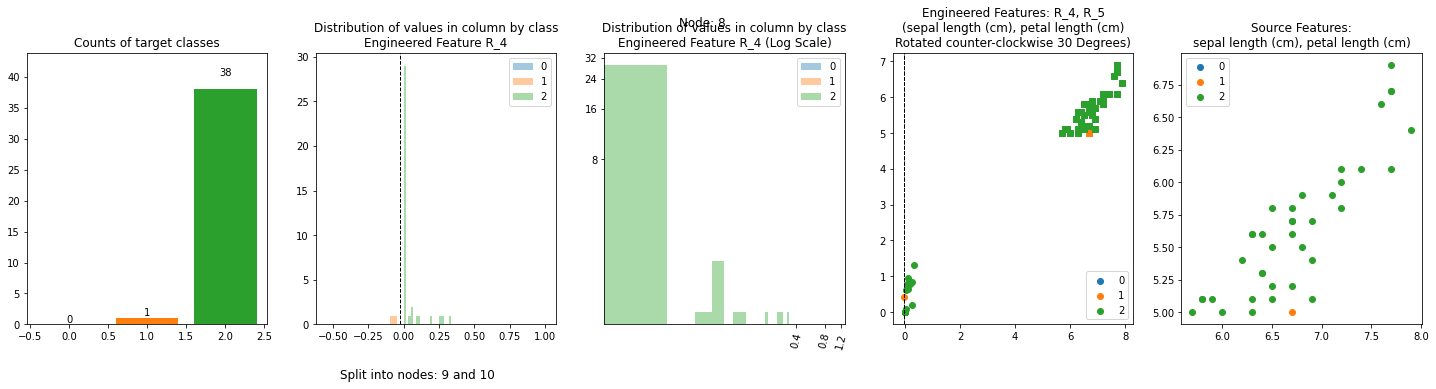

node_idx:  9


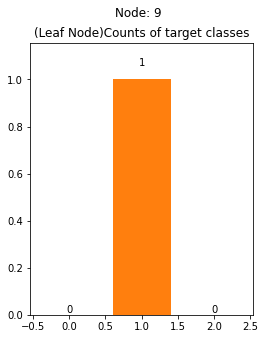

node_idx:  10


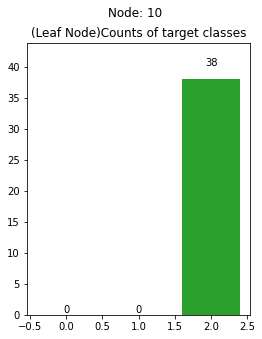

In [10]:
GraphTwoDimTree().graph_tree(dt.tree_, 
                             X_train, 
                             X_train_extended, 
                             y_train, 
                             dt.classes_,
                             node_indexes, 
                             rota.get_feature_sources(),
                             rota.scaler_, 
                             row=None,
                             show_log_scale=True)